# Clustering Barcelona Neighbors

## Load data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
barcelona_venues = pd.read_csv('barcelona_venues.csv', index_col=0)

In [5]:
print(barcelona_venues.shape)
barcelona_venues.head()

(8988, 7)


stations  stations Latitude  stations Longitude  \
0  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
1  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
2  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
3  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
4  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   

                     Venue  Venue Latitude  Venue Longitude  \
0    Camp Hebron-Teixonera       41.425532         2.146341   
1                Bar Plaza       41.421942         2.141679   
2                Bar Smith       41.424204         2.147051   
3                  Caprabo       41.424942         2.140979   
4  Mercat de Vall d'Hebron       41.424229         2.142355   

       Venue Category  
0        Soccer Field  
1  Spanish Restaurant  
2                 Bar  
3       Grocery Store  
4      Farmers Market

Import neighborhood data

In [11]:
import geopandas as gp
neigh = gp.read_file("barcelona_neigh.shp")
neigh.crs

{'init': 'epsg:25831'}

In [7]:
#shape of barcelona
barcelona = neigh.geometry.unary_union

## Filtering the data only within Madrid limits

In [9]:
print(barcelona_venues.shape)
barcelona_venues.head()

(8988, 7)


stations  stations Latitude  stations Longitude  \
0  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
1  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
2  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
3  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
4  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   

                     Venue  Venue Latitude  Venue Longitude  \
0    Camp Hebron-Teixonera       41.425532         2.146341   
1                Bar Plaza       41.421942         2.141679   
2                Bar Smith       41.424204         2.147051   
3                  Caprabo       41.424942         2.140979   
4  Mercat de Vall d'Hebron       41.424229         2.142355   

       Venue Category  
0        Soccer Field  
1  Spanish Restaurant  
2                 Bar  
3       Grocery Store  
4      Farmers Market

In [12]:
geo_venues = gp.GeoDataFrame(
     barcelona_venues, geometry=gp.points_from_xy(barcelona_venues['stations Longitude'], barcelona_venues['stations Latitude']))
#this coordinates are in epsg:4326 we need them with the same as neigh
geo_venues.crs = {'init': 'epsg:4326'}
geo_venues = geo_venues.to_crs(epsg=25831)

In [13]:
print(geo_venues.shape)
geo_venues.head()

(8988, 8)


stations  stations Latitude  stations Longitude  \
0  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
1  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
2  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
3  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
4  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   

                     Venue  Venue Latitude  Venue Longitude  \
0    Camp Hebron-Teixonera       41.425532         2.146341   
1                Bar Plaza       41.421942         2.141679   
2                Bar Smith       41.424204         2.147051   
3                  Caprabo       41.424942         2.140979   
4  Mercat de Vall d'Hebron       41.424229         2.142355   

       Venue Category                                     geometry  
0        Soccer Field  POINT (428388.4343855298 4586283.660400035)  
1  Spanish Restaurant  POINT (428388.4343855298 4586283.660400035)  
2                 Bar  POINT (428388.4343855298 4586283.660400035)  
3       Grocery Store  POINT (428388.4343855298 4586283.660400035)  
4      Farmers Market  POINT (428388.4343855298 4586283.660400035)

In [14]:
venues_only_barcelona = barcelona_venues[geo_venues.within(barcelona)]
print(venues_only_barcelona.shape)

(7360, 8)


In [15]:
barcelona_venues = venues_only_barcelona
barcelona_venues.head()

stations  stations Latitude  stations Longitude  \
0  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
1  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
2  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
3  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   
4  VALL D'HEBRON/METRO (L3, L5)          41.424923            2.142987   

                     Venue  Venue Latitude  Venue Longitude  \
0    Camp Hebron-Teixonera       41.425532         2.146341   
1                Bar Plaza       41.421942         2.141679   
2                Bar Smith       41.424204         2.147051   
3                  Caprabo       41.424942         2.140979   
4  Mercat de Vall d'Hebron       41.424229         2.142355   

       Venue Category                    geometry  
0        Soccer Field  POINT (2.142987 41.424923)  
1  Spanish Restaurant  POINT (2.142987 41.424923)  
2                 Bar  POINT (2.142987 41.424923)  
3       Grocery Store  POINT (2.142987 41.424923)  
4      Farmers Market  POINT (2.142987 41.424923)

## Data preparation

We remove the venues Metro station and train station

In [16]:
# we will remove train station, metro station and light rail station
barcelona_venues = barcelona_venues[barcelona_venues['Venue Category'] != 'Train Station']
barcelona_venues = barcelona_venues[barcelona_venues['Venue Category'] != 'Metro Station']
barcelona_venues = barcelona_venues[barcelona_venues['Venue Category'] != 'Tram Station']
barcelona_venues = barcelona_venues[barcelona_venues['Venue Category'] != 'Light Rail Station']
barcelona_venues.shape

(7294, 8)

### How many venues per station are there?

In [17]:
venues_per_station = barcelona_venues.groupby('stations').count()\
    .sort_values(by='Venue', ascending=False)\
    .reset_index().iloc[:,0:2].rename(columns = {'stations Latitude':'n'})

In [18]:
print(venues_per_station.shape)
venues_per_station

(144, 2)


stations    n
0                                   GRÀCIA/FGC (L6,L7)  100
1                                  DIAGONAL/METRO (L3)  100
2                                    TETUAN/METRO (L2)  100
3                                 DRASSANES/METRO (L3)  100
4                                   FONTANA/METRO (L3)  100
5                    FRANCESC MACIÀ/TRAMVIA (T1,T2,T3)  100
6                                    GIRONA/METRO (L4)  100
7                                 CATALUNYA/METRO (L1)  100
8                               UNIVERSITAT/METRO (L2)  100
9                                   JAUME I/METRO (L4)  100
10                                 SANT PAU/METRO (L5)  100
11                           L'ILLA/TRAMVIA (T1,T2,T3)  100
12                                   URGELL/METRO (L1)  100
13                                    SANT GERVASI/FGC  100
14                               URQUINAONA/METRO (L4)  100
15                                    LICEU/METRO (L3)  100
16                                VERDAGUER/METRO (L5)  100
17                              SANT ANTONI/METRO (L2)  100
18                               MONUMENTAL/METRO (L2)  100
19                                 ROCAFORT/METRO (L1)  100
20                        PASSEIG DE GRÀCIA/METRO (L2)  100
21                                        PROVENÇA/FGC  100
22                               PLAÇA MOLINA/FGC (L7)  100
23                            PLAÇA MOLINA<center>/FGC  100
24                              BARCELONETA/METRO (L4)   99
25                            SANTS ESTACIÓ/METRO (L3)   99
26                         PLAÇA DEL CENTRE/METRO (L3)   99
27                                     DE FRANÇA/RENFE   99
28                          HOSPITAL CLÍNIC/METRO (L5)   98
29                                POBLE SEC/METRO (L3)   98
..                                                 ...  ...
114                                  LA PAU/METRO (L4)   16
115                      SANT RAMON/TRAMVIA (T1,T2,T3)   16
116                               VIA JÚLIA/METRO (L4)   16
117                             BAC DE RODA/METRO (L2)   15
118                       VALL D'HEBRON/METRO (L3, L5)   14
119  Terminal Marítima Sant Bertran *Ferris/Termina...   14
120                           VALL D'HEBRÓN/METRO (L5)   14
121                     Jaume I/Transbordador del Port   13
122                      Castell/Telefèric de Montjuïc   12
123                               CANYELLES/METRO (L3)   12
124  Terminal Marítima D *Creuers/Terminal Marítima...   11
125                ALFONS EL MAGNÀNIM/TRAMVIA (T5, T6)   11
126                               PENITENTS/METRO (L3)   11
127                                ROQUETES/METRO (L3)   11
128  Terminal Marítima E *Creuers/Terminal Marítima...   10
129                           BARÓ DE VIVER/METRO (L1)   10
130                               VALLDAURA/METRO (L3)   10
131                               EL CARMEL/METRO (L5)    9
132                         BON PASTOR/METRO (L9, L10)    9
133                  EL COLL / LA TEIXONERA/METRO (L5)    8
134                           TRINITAT NOVA/METRO (L3)    7
135                        CASA DE L'AIGUA/METRO (L11)    6
136                          TRINITAT VELLA/METRO (L1)    5
137                       CIUTAT MERIDIANA/METRO (L11)    5
138  Estació Marítima Grimaldi Lines/Estació Maríti...    4
139                        BAIXADOR DE VALLVIDRERA/FGC    4
140                                  PEU FUNICULAR/FGC    3
141                             TORRE BARÓ/METRO (L11)    3
142                     inferior/Funicular VALLVIDRERA    3
143                                     LES PLANES/FGC    2

[144 rows x 2 columns]

Stations with less than 10 venues

In [19]:
print(venues_per_station[venues_per_station['n']<10].shape)
venues_per_station[venues_per_station['n']<10]

(13, 2)


stations  n
131                               EL CARMEL/METRO (L5)  9
132                         BON PASTOR/METRO (L9, L10)  9
133                  EL COLL / LA TEIXONERA/METRO (L5)  8
134                           TRINITAT NOVA/METRO (L3)  7
135                        CASA DE L'AIGUA/METRO (L11)  6
136                          TRINITAT VELLA/METRO (L1)  5
137                       CIUTAT MERIDIANA/METRO (L11)  5
138  Estació Marítima Grimaldi Lines/Estació Maríti...  4
139                        BAIXADOR DE VALLVIDRERA/FGC  4
140                                  PEU FUNICULAR/FGC  3
141                             TORRE BARÓ/METRO (L11)  3
142                     inferior/Funicular VALLVIDRERA  3
143                                     LES PLANES/FGC  2

### How many unique categories  are there?

In [20]:
print('There are {} uniques categories.'.format(len(barcelona_venues['Venue Category'].unique())))

There are 317 uniques categories.


### Prepare the data for Clustering
#### One hot encoding

In [21]:
# one hot encoding
barcelona_onehot = pd.get_dummies(barcelona_venues[['Venue Category']], prefix="", prefix_sep="")
cols = list(barcelona_onehot.columns)
barcelona_onehot.shape

(7294, 317)

In [22]:
# Insert the column station
cols = list(barcelona_onehot.columns)
barcelona_onehot['station'] = barcelona_venues.stations
barcelona_onehot = barcelona_onehot[['station'] + cols]
barcelona_onehot.head()

station  Accessories Store  African Restaurant  \
0  VALL D'HEBRON/METRO (L3, L5)                  0                   0   
1  VALL D'HEBRON/METRO (L3, L5)                  0                   0   
2  VALL D'HEBRON/METRO (L3, L5)                  0                   0   
3  VALL D'HEBRON/METRO (L3, L5)                  0                   0   
4  VALL D'HEBRON/METRO (L3, L5)                  0                   0   

   American Restaurant  Amphitheater  Animal Shelter  Antique Shop  Aquarium  \
0                    0             0               0             0         0   
1                    0             0               0             0         0   
2                    0             0               0             0         0   
3                    0             0               0             0         0   
4                    0             0               0             0         0   

   Arcade  Arepa Restaurant  ...  Venezuelan Restaurant  Video Game Store  \
0       0                 0  ...                      0                 0   
1       0                 0  ...                      0                 0   
2       0                 0  ...                      0                 0   
3       0                 0  ...                      0                 0   
4       0                 0  ...                      0                 0   

   Video Store  Vietnamese Restaurant  Wine Bar  Wine Shop  Winery  \
0            0                      0         0          0       0   
1            0                      0         0          0       0   
2            0                      0         0          0       0   
3            0                      0         0          0       0   
4            0                      0         0          0       0   

   Women's Store  Yoga Studio  Zoo  
0              0            0    0  
1              0            0    0  
2              0            0    0  
3              0            0    0  
4              0            0    0  

[5 rows x 318 columns]

#### Group by station

In [23]:
barcelona_onehot_grouped = barcelona_onehot.groupby('station').mean().reset_index()
print(barcelona_onehot_grouped.shape)
barcelona_onehot_grouped.head()

(144, 318)


station  Accessories Store  African Restaurant  \
0  ALFONS EL MAGNÀNIM/TRAMVIA (T5, T6)           0.000000                 0.0   
1                  ALFONS X/METRO (L4)           0.000000                 0.0   
2                  ARC DE TRIOMF/RENFE           0.013333                 0.0   
3                AUDITORI/TRAMVIA (T4)           0.000000                 0.0   
4            AV. TIBIDABO/TRAMVIA BLAU           0.000000                 0.0   

   American Restaurant  Amphitheater  Animal Shelter  Antique Shop  Aquarium  \
0                  0.0           0.0             0.0           0.0       0.0   
1                  0.0           0.0             0.0           0.0       0.0   
2                  0.0           0.0             0.0           0.0       0.0   
3                  0.0           0.0             0.0           0.0       0.0   
4                  0.0           0.0             0.0           0.0       0.0   

     Arcade  Arepa Restaurant  ...  Venezuelan Restaurant  Video Game Store  \
0  0.000000               0.0  ...                    0.0               0.0   
1  0.000000               0.0  ...                    0.0               0.0   
2  0.013333               0.0  ...                    0.0               0.0   
3  0.000000               0.0  ...                    0.0               0.0   
4  0.000000               0.0  ...                    0.0               0.0   

   Video Store  Vietnamese Restaurant  Wine Bar  Wine Shop  Winery  \
0          0.0                    0.0       0.0        0.0     0.0   
1          0.0                    0.0       0.0        0.0     0.0   
2          0.0                    0.0       0.0        0.0     0.0   
3          0.0                    0.0       0.0        0.0     0.0   
4          0.0                    0.0       0.0        0.0     0.0   

   Women's Store  Yoga Studio  Zoo  
0            0.0     0.000000  0.0  
1            0.0     0.000000  0.0  
2            0.0     0.013333  0.0  
3            0.0     0.000000  0.0  
4            0.0     0.000000  0.0  

[5 rows x 318 columns]

##### Order the columns

In [24]:
ordered_columns = barcelona_onehot_grouped.sum()[1:].sort_values(ascending=False).index.to_list()
barcelona_onehot_sorted = barcelona_onehot_grouped[['station'] + ordered_columns]

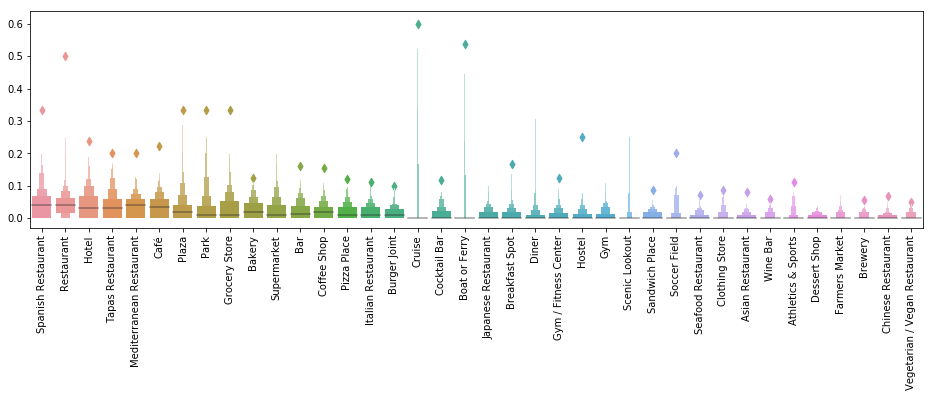

In [25]:
f, axes = plt.subplots(1, 1, figsize=(16, 4))
sns.boxenplot(ax=axes,data=barcelona_onehot_sorted.iloc[:,1:39])
plt.xticks(rotation=90)
plt.show()

#### We can combine some of the venues that are the same

In [26]:
barcelona_onehot_refine = pd.DataFrame(barcelona_onehot_sorted)
barcelona_onehot_refine = barcelona_onehot_refine.drop(columns=['Spanish Restaurant',
                                               'Restaurant',
                                               'Café',
                                               'Coffee Shop',
                                               'Gym / Fitness Center',
                                               'Gym'])
barcelona_onehot_refine['Restaurant'] = barcelona_onehot_sorted['Spanish Restaurant'] +\
                                                barcelona_onehot_sorted['Restaurant']

barcelona_onehot_refine['Coffe Shop'] = barcelona_onehot_sorted['Café'] +\
                                                barcelona_onehot_sorted['Coffee Shop']

barcelona_onehot_refine['Gym'] = barcelona_onehot_sorted['Gym / Fitness Center'] +\
                                                barcelona_onehot_sorted['Gym']

#sort columns again

ordered_columns = barcelona_onehot_refine.sum()[1:].sort_values(ascending=False).index.to_list()
barcelona_onehot_refine = barcelona_onehot_refine[['station'] + ordered_columns]

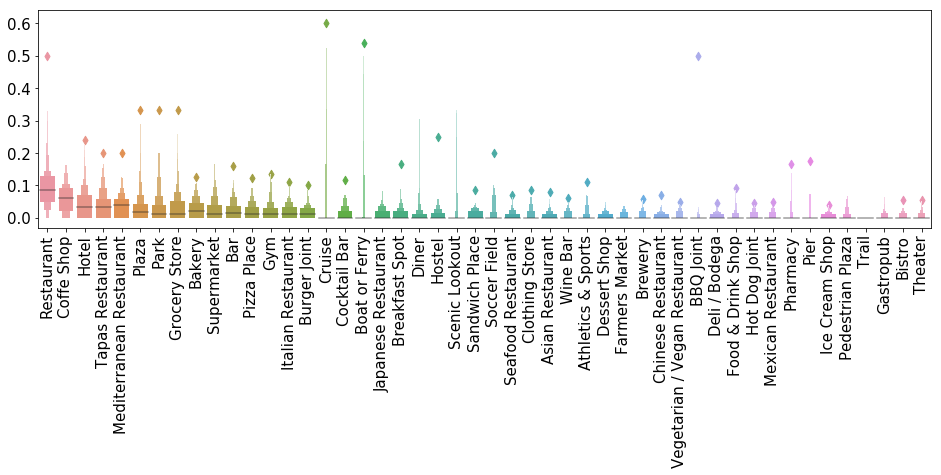

In [28]:
f, axes = plt.subplots(1, 1, figsize=(16, 4))
sns.boxenplot(ax=axes,data=barcelona_onehot_refine.iloc[:,1:49])
axes.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(rotation=90)
plt.show()

### Most common venues in dataframe

In [29]:
#First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#Now let's create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
stations_venues_sorted = pd.DataFrame(columns=columns)
stations_venues_sorted['station'] = barcelona_onehot_refine['station']

for ind in np.arange(barcelona_onehot_refine.shape[0]):
    stations_venues_sorted.iloc[ind, 1:] = return_most_common_venues(barcelona_onehot_refine.iloc[ind, :], num_top_venues)

stations_venues_sorted.head()

station 1st Most Common Venue  \
0  ALFONS EL MAGNÀNIM/TRAMVIA (T5, T6)            Restaurant   
1                  ALFONS X/METRO (L4)            Coffe Shop   
2                  ARC DE TRIOMF/RENFE            Coffe Shop   
3                AUDITORI/TRAMVIA (T4)            Restaurant   
4            AV. TIBIDABO/TRAMVIA BLAU                 Plaza   

  2nd Most Common Venue 3rd Most Common Venue     4th Most Common Venue  \
0         Grocery Store     Food & Drink Shop                Skate Park   
1         Grocery Store            Restaurant          Tapas Restaurant   
2                 Hotel            Restaurant                    Bistro   
3            Coffe Shop                 Hotel                    Bakery   
4                  Park            Restaurant  Mediterranean Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                 Diner         Big Box Store           Supermarket   
1                Bakery    Chinese Restaurant                   Gym   
2                   Gym           Pizza Place                Hostel   
3               Theater                   Gym                   Bar   
4         Grocery Store                Bakery          Cocktail Bar   

      8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                    Bakery          Climbing Gym             Coffe Shop  
1                      Park          Soccer Field     Seafood Restaurant  
2  Mediterranean Restaurant    Chinese Restaurant         Breakfast Spot  
3               Supermarket           Music Venue              Rock Club  
4               Planetarium                   Bar            Supermarket

## Save the data before clustering

In [30]:
print(barcelona_onehot_refine.shape)
print(stations_venues_sorted.shape)

(144, 315)
(144, 11)


### Save

In [31]:
barcelona_onehot_refine.to_csv('barcelona_onehot_refine.csv')
stations_venues_sorted.to_csv('stations_venues_sorted.csv')

### Load

In [32]:
import pandas as pd
barcelona_onehot_grouped = pd.read_csv('barcelona_onehot_refine.csv', index_col=0)
stations_venues_sorted = pd.read_csv('stations_venues_sorted.csv', index_col=0)

print(barcelona_onehot_grouped.shape)
print(stations_venues_sorted.shape)

(144, 315)
(144, 11)


In [54]:
neigh.head()

BARRI Dto  code             neighborho  population    density  \
0     13   3    13      la Marina de Port       31087  24.504774   
1     14   3    14  la Font de la Guatlla       10373  34.917756   
2      1   1     1               el Raval       48297  43.894946   
3      2   1     2         el Barri Gòtic       19180  23.516604   
4      3   1     3         la Barceloneta       15173  12.865213   

                                            geometry  
0  POLYGON ((428042.1568 4579741.6635, 428051.277...  
1  POLYGON ((428820.0575000001 4580133.021500001,...  
2  POLYGON ((430162.1875 4581936.9845, 430550.104...  
3  POLYGON ((431189.9074999997 4581851.4475, 4313...  
4  POLYGON ((432798.7341 4582081.2599, 432805.852...

## Visualization

function for plot maps with clusters colors

In [123]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
# open

# create map of Barcelona using latitude and longitude mean values and clusters
def show_in_map(data, k):
    map_clusters = folium.Map(location=[data.Latitude.mean(), data.Longitude.mean()], 
                              zoom_start=12, control_scale=True)
    folium.TileLayer('cartodbpositron', attr='igs').add_to(map_clusters)

    choropleth = folium.Choropleth(
        geo_data=neigh,
        data=neigh[['neighborho','density']],
        columns=['neighborho','density'],
        key_on='feature.properties.neighborho',
        fill_color='YlGn',
        fillOpacity= 0.1,
        legend_name='density (inhabitats per square km)',
        highlight=True
    ).add_to(map_clusters)

    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['density','neighborho'])
    )
    
    # set color scheme for the clusters
    x = np.arange(k)
    ys = [i + x + (i*x)**2 for i in range(kclusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster in zip(data['Latitude'], 
                                      data['Longitude'], 
                                      data['station'], 
                                      data['Cluster Labels']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster],
            fill=True,
            fill_color=rainbow[cluster],
            fill_opacity=0.7).add_to(map_clusters)
        
    legend_start =   '''
                <div style="position: fixed; 
                            top: 50px; left: 50px; width: 100px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            background-color: hsla(89, 43%, 51%, 0.3);
                            ">&nbsp; Legend <br>
                '''
    legend_end =    '''             
                    </div>
                    ''' 
    legend_html = legend_start 
    for pp in range(kclusters):
        leg = '&nbsp; Cluster {} &nbsp; <i class="fa fa-circle" style="color:{}"></i><br>'.format(pp, rainbow[pp])
        legend_html = legend_html + leg
                                                                                                  
    legend_html = legend_html + legend_end

    map_clusters.get_root().html.add_child(folium.Element(legend_html))

    return map_clusters


In [34]:
# Barcelona Stations
barcelona_stations = pd.read_csv('metro_barcelona_uniques.csv', index_col=0)

def create_map(data, height='100%', width='100%'):
    mapi = folium.Map(location=[data.Latitude.mean(), data.Longitude.mean()], 
                      zoom_start=12,
                      control_scale = True, height=height, width=width)
    folium.TileLayer('cartodbpositron', attr='igs').add_to(mapi)

    # set color scheme for the clusters
    n = len(data['line'].unique())
    x = np.arange(n)
    perro = dict(zip(data['line'].unique(),x))
    ys = [i + x + (i*x)**2 for i in range(n)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]



    # add markers to the map
    markers_colors = []
    for lat, lon, poi, line in zip(data['Latitude'], 
                                      data['Longitude'], 
                                      data['station'], 
                                      data['line']):
        label = folium.Popup(str(poi) + ' Line ' + str(line), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=2,
            popup=label,
            color=rainbow[perro[line]-1],
            fill=True,
            fill_color=rainbow[int(perro[line])-1],
            fill_opacity=0.7).add_to(mapi)

    return mapi

## Clustering

In [35]:
onehot = barcelona_onehot_grouped.copy()
mostcomon_venues = stations_venues_sorted.copy()

### Removing some of the neiborhoods

Some of the neighborhoods are not significative, like the ones in the top of furnicular in the top of the mountain and those places in the harbour

In [36]:
idx_to_remove = onehot[onehot['station'].str.contains('Marítima') \
                       | onehot['station'].str.contains('funicular', case=False)].index

onehot.iloc[idx_to_remove]

station  Restaurant  \
40   Estació Marítima Grimaldi Lines/Estació Maríti...    0.000000   
89                                   PEU FUNICULAR/FGC    0.000000   
123  Terminal Marítima A *Creuers/Terminal Marítima...    0.000000   
124  Terminal Marítima C *Creuers/Terminal Marítima...    0.000000   
125  Terminal Marítima D *Creuers/Terminal Marítima...    0.000000   
126  Terminal Marítima E *Creuers/Terminal Marítima...    0.000000   
127  Terminal Marítima Maremàgnum *Creuers/Terminal...    0.055556   
128  Terminal Marítima Sant Bertran *Ferris/Termina...    0.142857   
142                     inferior/Funicular VALLVIDRERA    0.000000   
143                        superior/Funicular TIBIDABO    0.000000   

     Coffe Shop     Hotel  Tapas Restaurant  Mediterranean Restaurant  \
40     0.000000  0.000000          0.000000                  0.000000   
89     0.000000  0.000000          0.000000                  0.000000   
123    0.000000  0.000000          0.000000                  0.000000   
124    0.000000  0.000000          0.000000                  0.000000   
125    0.090909  0.000000          0.000000                  0.000000   
126    0.000000  0.000000          0.000000                  0.000000   
127    0.074074  0.074074          0.037037                  0.055556   
128    0.000000  0.071429          0.000000                  0.071429   
142    0.000000  0.000000          0.000000                  0.000000   
143    0.034483  0.034483          0.034483                  0.034483   

        Plaza      Park  Grocery Store  Bakery  ...  Bubble Tea Shop  \
40   0.000000  0.000000            0.0     0.0  ...              0.0   
89   0.000000  0.000000            0.0     0.0  ...              0.0   
123  0.000000  0.000000            0.0     0.0  ...              0.0   
124  0.000000  0.000000            0.0     0.0  ...              0.0   
125  0.000000  0.000000            0.0     0.0  ...              0.0   
126  0.000000  0.000000            0.0     0.0  ...              0.0   
127  0.018519  0.000000            0.0     0.0  ...              0.0   
128  0.000000  0.071429            0.0     0.0  ...              0.0   
142  0.000000  0.000000            0.0     0.0  ...              0.0   
143  0.034483  0.000000            0.0     0.0  ...              0.0   

     Pet Café  Vacation Rental  Residential Building (Apartment / Condo)  \
40        0.0              0.0                                       0.0   
89        0.0              0.0                                       0.0   
123       0.0              0.0                                       0.0   
124       0.0              0.0                                       0.0   
125       0.0              0.0                                       0.0   
126       0.0              0.0                                       0.0   
127       0.0              0.0                                       0.0   
128       0.0              0.0                                       0.0   
142       0.0              0.0                                       0.0   
143       0.0              0.0                                       0.0   

     General Entertainment  Souvenir Shop  Indie Theater  Kosher Restaurant  \
40                     0.0            0.0            0.0                0.0   
89                     0.0            0.0            0.0                0.0   
123                    0.0            0.0            0.0                0.0   
124                    0.0            0.0            0.0                0.0   
125                    0.0            0.0            0.0                0.0   
126                    0.0            0.0            0.0                0.0   
127                    0.0            0.0            0.0                0.0   
128                    0.0            0.0            0.0                0.0   
142                    0.0            0.0            0.0                0.0   
143                    0.0            0.0           

Plot this places

In [37]:
create_map(barcelona_stations[barcelona_stations['station'].str.contains('Marítima') \
                       | barcelona_stations['station'].str.contains('funicular', case=False)])

drop the indexes

In [38]:
onehot.drop(index=idx_to_remove, inplace=True)
mostcomon_venues.drop(index=idx_to_remove, inplace=True)

In [39]:
mostcomon_venues.shape

(134, 11)

Sort columns again

In [40]:
onehot.head()

station  Restaurant  Coffe Shop     Hotel  \
0  ALFONS EL MAGNÀNIM/TRAMVIA (T5, T6)    0.090909    0.090909  0.000000   
1                  ALFONS X/METRO (L4)    0.069767    0.139535  0.000000   
2                  ARC DE TRIOMF/RENFE    0.066667    0.080000  0.080000   
3                AUDITORI/TRAMVIA (T4)    0.125000    0.089286  0.053571   
4            AV. TIBIDABO/TRAMVIA BLAU    0.065217    0.021739  0.021739   

   Tapas Restaurant  Mediterranean Restaurant     Plaza      Park  \
0          0.090909                  0.000000  0.000000  0.000000   
1          0.069767                  0.000000  0.023256  0.046512   
2          0.013333                  0.040000  0.000000  0.013333   
3          0.017857                  0.017857  0.000000  0.017857   
4          0.000000                  0.065217  0.108696  0.086957   

   Grocery Store    Bakery  ...  Bubble Tea Shop  Pet Café  Vacation Rental  \
0       0.090909  0.090909  ...              0.0       0.0              0.0   
1       0.093023  0.069767  ...              0.0       0.0              0.0   
2       0.000000  0.013333  ...              0.0       0.0              0.0   
3       0.000000  0.035714  ...              0.0       0.0              0.0   
4       0.065217  0.043478  ...              0.0       0.0              0.0   

   Residential Building (Apartment / Condo)  General Entertainment  \
0                                       0.0                    0.0   
1                                       0.0                    0.0   
2                                       0.0                    0.0   
3                                       0.0                    0.0   
4                                       0.0                    0.0   

   Souvenir Shop  Indie Theater  Kosher Restaurant  Pakistani Restaurant  \
0            0.0            0.0                0.0                   0.0   
1            0.0            0.0                0.0                   0.0   
2            0.0            0.0                0.0                   0.0   
3            0.0            0.0                0.0                   0.0   
4            0.0            0.0                0.0                   0.0   

   Neighborhood  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 315 columns]

In [41]:
ordered_columns = onehot.sum()[1:].sort_values(ascending=False).index.to_list()
onehot = onehot[['station'] + ordered_columns]
onehot.head()

station  Restaurant  Coffe Shop     Hotel  \
0  ALFONS EL MAGNÀNIM/TRAMVIA (T5, T6)    0.090909    0.090909  0.000000   
1                  ALFONS X/METRO (L4)    0.069767    0.139535  0.000000   
2                  ARC DE TRIOMF/RENFE    0.066667    0.080000  0.080000   
3                AUDITORI/TRAMVIA (T4)    0.125000    0.089286  0.053571   
4            AV. TIBIDABO/TRAMVIA BLAU    0.065217    0.021739  0.021739   

   Tapas Restaurant  Mediterranean Restaurant     Plaza      Park  \
0          0.090909                  0.000000  0.000000  0.000000   
1          0.069767                  0.000000  0.023256  0.046512   
2          0.013333                  0.040000  0.000000  0.013333   
3          0.017857                  0.017857  0.000000  0.017857   
4          0.000000                  0.065217  0.108696  0.086957   

   Grocery Store    Bakery  ...  Fondue Restaurant  Cruise  Harbor / Marina  \
0       0.090909  0.090909  ...                0.0     0.0              0.0   
1       0.093023  0.069767  ...                0.0     0.0              0.0   
2       0.000000  0.013333  ...                0.0     0.0              0.0   
3       0.000000  0.035714  ...                0.0     0.0              0.0   
4       0.065217  0.043478  ...                0.0     0.0              0.0   

   Surf Spot  Event Service  Trail  Port  Church  Cable Car  Theme Park  
0        0.0            0.0    0.0   0.0     0.0        0.0         0.0  
1        0.0            0.0    0.0   0.0     0.0        0.0         0.0  
2        0.0            0.0    0.0   0.0     0.0        0.0         0.0  
3        0.0            0.0    0.0   0.0     0.0        0.0         0.0  
4        0.0            0.0    0.0   0.0     0.0        0.0         0.0  

[5 rows x 315 columns]

### Kmeans

In [42]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [43]:
#Data for clustering
data_clustering = onehot.drop('station', 1)

Checking the best k for the dataset

In [48]:
import matplotlib.pyplot as plt

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(data_clustering)
    sse.append(km.inertia_)


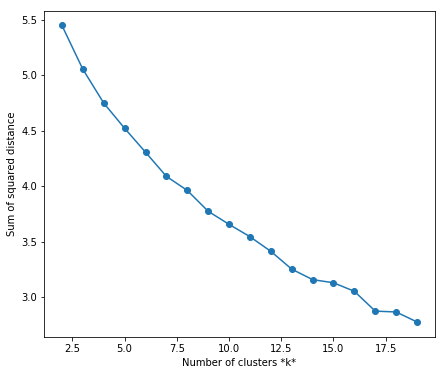

In [49]:
# Plot sse against k
plt.figure(figsize=(7, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

plt.show()

In [72]:
#siluethe score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    cluster_labels = km.fit_predict(data_clustering)
    silhouette_avg = silhouette_score(data_clustering, cluster_labels)
    sse.append(silhouette_avg)

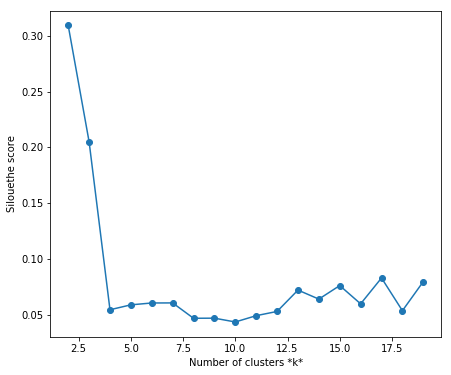

In [73]:
# Plot sse against k
plt.figure(figsize=(7, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silouethe score')

plt.show()

### Kmeans weighted

In [77]:
#weights
#dataframe for weighted
barcelona_onehot_sum = barcelona_onehot.groupby('station').sum().reset_index()
barcelona_onehot_sum.head()
Y = barcelona_onehot_sum.sum(axis=1)
Y.drop(index=idx_to_remove, inplace=True)
Y.shape

(134,)

In [78]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(data_clustering, sample_weight=Y)
    sse.append(km.inertia_)

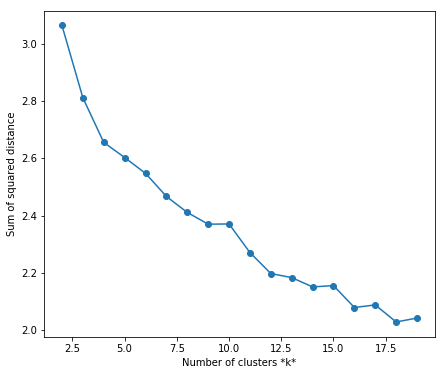

In [79]:
# Plot sse against k
plt.figure(figsize=(7, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

plt.show()

In [80]:
#siluethe score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 20))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    cluster_labels = km.fit_predict(data_clustering, sample_weight=Y)
    silhouette_avg = silhouette_score(data_clustering, cluster_labels)
    sse.append(silhouette_avg)

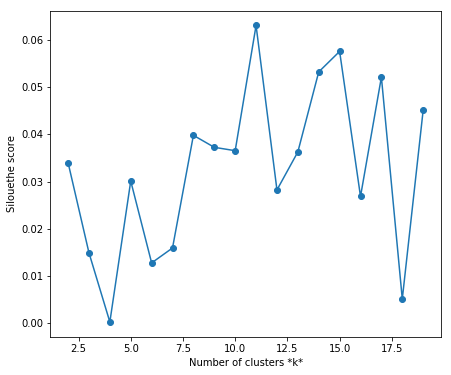

In [81]:
# Plot sse against k
plt.figure(figsize=(7, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silouethe score')

plt.show()

There is not clear elbow in the graph. We can take k = 10 because kmenas weighted are showing good perfromance with 10
### K = 10

In [91]:

# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data_clustering, sample_weight=Y)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([9, 9, 1, 1, 4, 0, 9, 9, 9, 8])

## Visualizing the clusters

In [108]:
print("Location by Cluster")
pd.Series(kmeans.labels_).value_counts()

Location by Cluster


1    38
9    30
7    19
0    17
4    13
2    11
5     3
8     1
6     1
3     1
dtype: int64

In [93]:
# add clustering labels
mcv = mostcomon_venues.copy()
mcv.insert(0, 'Cluster Labels', kmeans.labels_)

barcelona_merged = barcelona_stations.iloc[:,1:]
barcelona_merged['station'] = barcelona_stations['station'] + '/' + barcelona_stations['line']

# merge barcelona_stations with barcelona_merged to add latitude/longitude for each neighborhood
barcelona_merged = barcelona_merged.join(mcv.set_index('station'), on='station')

barcelona_merged = barcelona_merged.drop('NOM_BARRI',1)
barcelona_merged = barcelona_merged.dropna()
barcelona_merged = barcelona_merged.astype({'Cluster Labels':'int32'})

print(barcelona_merged.shape)
barcelona_merged.head()

(134, 15)


Longitude   Latitude            line                       station  \
0   2.142987  41.424923  METRO (L3, L5)  VALL D'HEBRON/METRO (L3, L5)   
1   2.158326  41.392331             FGC                  PROVENÇA/FGC   
2   2.119370  41.399203        FGC (L6)       REINA ELISENDA/FGC (L6)   
3   2.135427  41.397791        FGC (L6)          LA BONANOVA/FGC (L6)   
4   2.185391  41.451492     METRO (L11)   CASA DE L'AIGUA/METRO (L11)   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               4            Restaurant        Soccer Stadium   
1               2                 Hotel            Restaurant   
2               1            Restaurant            Coffe Shop   
3               1            Restaurant   Japanese Restaurant   
4               5            Restaurant                  Park   

      3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                    Bakery    Athletics & Sports        Farmers Market   
1  Mediterranean Restaurant          Cocktail Bar      Tapas Restaurant   
2                    Bakery        Breakfast Spot      Tapas Restaurant   
3        Italian Restaurant            Coffe Shop             Gastropub   
4            Breakfast Spot         Grocery Store              Pharmacy   

      6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Basketball Court                   Bar               Stadium   
1                  Boutique        Sandwich Place                Hostel   
2  Mediterranean Restaurant          Dessert Shop      Pedestrian Plaza   
3               Salad Place                Bakery                   Gym   
4                  Pie Shop            Food Court   Monument / Landmark   

       9th Most Common Venue 10th Most Common Venue  
0               Soccer Field          Grocery Store  
1               Burger Joint                    Gym  
2               Burger Joint                  Diner  
3               Burger Joint                 Bistro  
4  South American Restaurant             Taco Place

In [124]:
show_in_map(barcelona_merged, kclusters)

### Boxplots

In [95]:
barcelona_onehot_clusters = onehot.copy()
barcelona_onehot_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

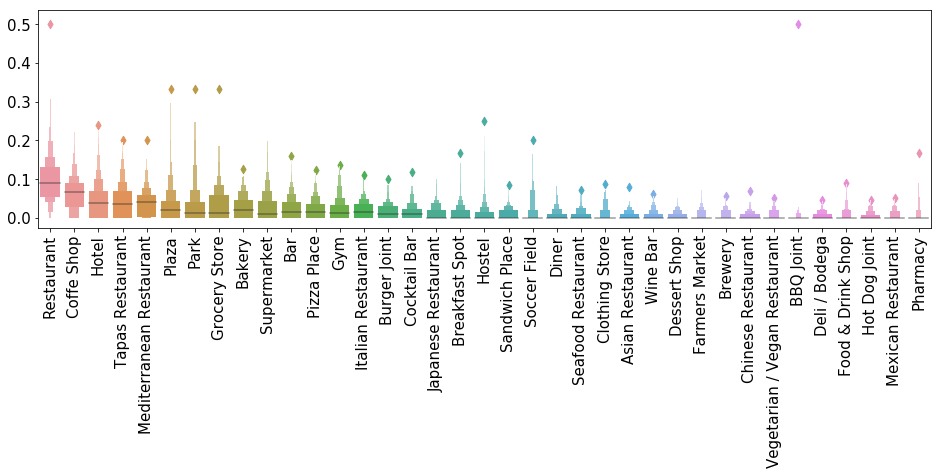

In [98]:
f, axes = plt.subplots(1, 1, figsize=(16, 4))
sns.boxenplot(ax=axes,data=barcelona_onehot_clusters.iloc[:,2:39])
axes.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(rotation=90)
plt.show()

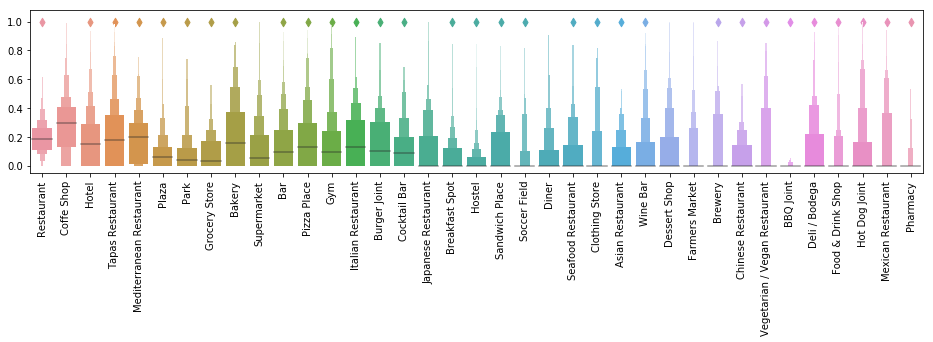

In [99]:
## Same graph normalize
barcelona_norm = barcelona_onehot_clusters.copy()
barcelona_norm.iloc[:,1:] = barcelona_norm.iloc[:,2:].apply(lambda x: x/x.max(), axis=0)

f, axes = plt.subplots(1, 1, figsize=(16, 3))
sns.boxenplot(ax=axes,data=barcelona_norm.iloc[:,2:39])
plt.xticks(rotation=90)
plt.show()

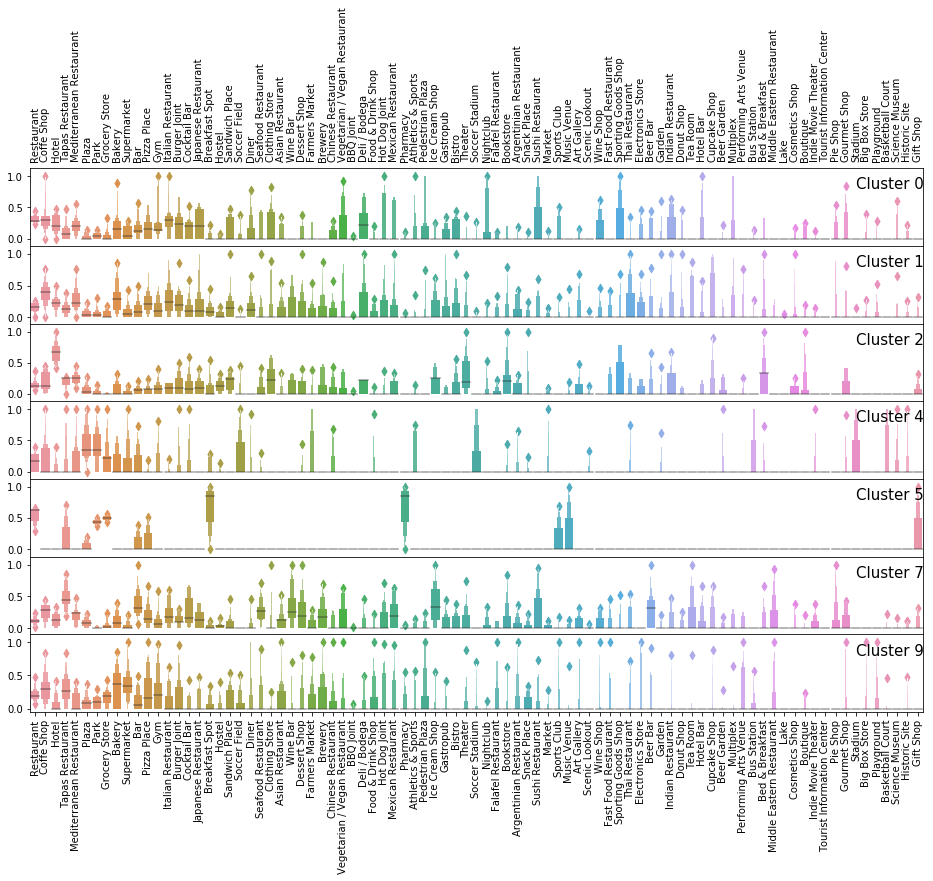

In [107]:
f, axes = plt.subplots(7, 1, figsize=(16, 10), sharex=True)
# Remove horizontal space between axes
f.subplots_adjust(hspace=0)

index = 0
for i in [0,1,2,4,5,7,9]:
    sns.boxenplot(ax=axes[index],data=barcelona_norm[barcelona_norm['Cluster Labels'] == i].iloc[:,2:89])
    axes[index].text(80, 0.8, r'Cluster {}'.format(i), fontsize=15)
    axes[index].tick_params(axis='both', which='major', labelsize=10)
    index = index+1

axes[0].xaxis.set_tick_params(labeltop=True,rotation=90)
    
plt.xticks(rotation=90)
plt.show()

In [126]:
show_in_map(barcelona_merged, kclusters)

## Save de results

In [110]:
print('barcelona_merged: ', barcelona_merged.shape)
print('barcelona_onehot_clusters.dropna(axis=1): ', barcelona_onehot_clusters.dropna(axis=1).shape)
barcelona_merged.to_csv('barcelona_merged_clusters5_result.csv')
barcelona_onehot_clusters.dropna(axis=1).to_csv('barcelona_onehot_clusters5_result.csv')

barcelona_merged:  (134, 15)
barcelona_onehot_clusters.dropna(axis=1):  (134, 316)


In [111]:
barcelona_merged

Longitude   Latitude                   line  \
0     2.142987  41.424923         METRO (L3, L5)   
1     2.158326  41.392331                    FGC   
2     2.119370  41.399203               FGC (L6)   
3     2.135427  41.397791               FGC (L6)   
4     2.185391  41.451492            METRO (L11)   
5     2.174473  41.460889            METRO (L11)   
6     2.168588  41.387200             METRO (L1)   
10    2.179581  41.400180             METRO (L2)   
11    2.153966  41.379070             METRO (L1)   
12    2.168735  41.389295             METRO (L2)   
14    2.161228  41.430042             METRO (L5)   
16    2.197653  41.411242       TRAMVIA (T5, T6)   
17    2.115012  41.380480     TRAMVIA (T1,T2,T3)   
20    2.219829  41.411777           TRAMVIA (T4)   
25    2.133190  41.373293             METRO (L1)   
26    2.145478  41.378565             METRO (L3)   
27    2.147798  41.434855             METRO (L3)   
29    2.215909  41.411740             METRO (L4)   
30    2.163252  41.385015             METRO (L2)   
35    2.127857  41.388357             METRO (L3)   
37    2.178826  41.444145             METRO (L4)   
38    2.141603  41.380858             METRO (L3)   
39    2.171334  41.394796             METRO (L4)   
40    2.172883  41.436715             METRO (L4)   
41    2.127313  41.375605             METRO (L5)   
42    2.202855  41.403481             METRO (L4)   
43    2.180781  41.423505             METRO (L5)   
44    2.149090  41.374291             METRO (L3)   
46    2.155013  41.423558             METRO (L5)   
50    2.149504  41.419877             METRO (L5)   
..         ...        ...                    ...   
323   2.121492  41.386718     TRAMVIA (T1,T2,T3)   
325   2.192179  41.395239             METRO (L4)   
327   2.147573  41.401403                    FGC   
341   2.188532  41.404209       TRAMVIA (T5, T6)   
344   2.166135  41.364048  Telefèric de Montjuïc   
350   2.200601  41.419306             METRO (L2)   
360   2.193312  41.435959                  RENFE   
388   2.136210  41.382176             METRO (L3)   
389   2.111704  41.384208             METRO (L3)   
394   2.194384  41.449539             METRO (L1)   
401   2.131844  41.389343     TRAMVIA (T1,T2,T3)   
427   2.163454  41.368756  Telefèric de Montjuïc   
454   2.197460  41.399026             METRO (L4)   
458   2.140978  41.417691             METRO (L3)   
460   2.139358  41.368228                    FGC   
465   2.205212  41.436173        METRO (L9, L10)   
468   2.141445  41.425067             METRO (L5)   
476   2.200227  41.450043             METRO (L1)   
484   2.131650  41.415969           TRAMVIA BLAU   
486   2.198381  41.406205           TRAMVIA (T4)   
507   2.152798  41.402597             METRO (L3)   
512   2.112031  41.376647     TRAMVIA (T1,T2,T3)   
558   2.091563  41.427474                    FGC   
559   2.130075  41.398154                    FGC   
565   2.097340  41.419668                    FGC   
569   2.147573  41.401403               FGC (L7)   
588   2.191390  41.404430           TRAMVIA (T4)   
597   2.142997  41.392183     TRAMVIA (T1,T2,T3)   
598   2.126641  41.388002     TRAMVIA (T1,T2,T3)   
617   2.178343  41.384137             METRO (L4)   

                                    station  Cluster Labels  \
0              VALL D'HEBRON/METRO (L3, L5)               4   
1                              PROVENÇA/FGC               2   
2                   REINA ELISENDA/FGC (L6)               1   
3                      LA BONANOVA/FGC (L6)               1   
4               CASA DE L'AIGUA/METRO (L11)               5   
5              CIUTAT MERIDIANA/METRO (L11)               4   
6                      CATALUNYA/METRO (L1)               2   
10                    MONUMENTAL/METRO (L2)               1   
11                      ROCAFORT/METRO (L1)               1   
12             PASSEIG DE GRÀCIA/METRO (L2)               2   
14                         HORTA/METRO (L5)               9   
16              ESPRONCE

In [112]:
# Save the training model
import pickle

# save the classifier
with open('barcelona_kmeans_model.pkl', 'wb') as fid:
    pickle.dump(kmeans, fid) 

### Cluster 0

In [127]:
cluster0 = barcelona_merged[barcelona_merged['Cluster Labels'] == 0].index
cluster1 = barcelona_merged[barcelona_merged['Cluster Labels'] == 1].index
cluster3 = barcelona_merged[barcelona_merged['Cluster Labels'] == 3].index
cluster2 = barcelona_merged[barcelona_merged['Cluster Labels'] == 2].index
cluster4 = barcelona_merged[barcelona_merged['Cluster Labels'] == 4].index
cluster5 = barcelona_merged[barcelona_merged['Cluster Labels'] == 5].index
cluster7 = barcelona_merged[barcelona_merged['Cluster Labels'] == 7].index
cluster9 = barcelona_merged[barcelona_merged['Cluster Labels'] == 9].index
cluster8 = barcelona_merged[barcelona_merged['Cluster Labels'] == 8].index
cluster6 = barcelona_merged[barcelona_merged['Cluster Labels'] == 6].index


barcelona_merged.loc[cluster0].iloc[:,5:]

1st Most Common Venue 2nd Most Common Venue     3rd Most Common Venue  \
17             Restaurant                   Gym                       Bar   
35             Restaurant            Coffe Shop               Supermarket   
38             Restaurant                 Hotel                Coffe Shop   
75             Restaurant                 Hotel  Mediterranean Restaurant   
87             Restaurant          Cocktail Bar                Coffe Shop   
145            Restaurant      Tapas Restaurant  Mediterranean Restaurant   
218            Restaurant             Nightclub                Coffe Shop   
228            Restaurant            Coffe Shop                     Hotel   
265            Restaurant            Coffe Shop                     Hotel   
323            Restaurant                 Hotel                Coffe Shop   
389            Restaurant                   Gym                       Bar   
401            Restaurant            Coffe Shop                     Hotel   
465            Restaurant            Coffe Shop        Italian Restaurant   
559            Restaurant                 Hotel  Mediterranean Restaurant   
588            Restaurant                 Hotel       Japanese Restaurant   
597            Restaurant            Coffe Shop       Japanese Restaurant   
598            Restaurant            Coffe Shop                     Hotel   

        4th Most Common Venue          5th Most Common Venue  \
17                  Nightclub                   Soccer Field   
35                        Bar                 Sandwich Place   
38              Grocery Store               Tapas Restaurant   
75               Burger Joint                    Pizza Place   
87           Tapas Restaurant       Mediterranean Restaurant   
145       Japanese Restaurant                    Supermarket   
218       Japanese Restaurant       Mediterranean Restaurant   
228            Clothing Store                          Diner   
265            Clothing Store            Sporting Goods Shop   
323                    Bakery  Vegetarian / Vegan Restaurant   
389                 Nightclub                  Hot Dog Joint   
401            Clothing Store                 Sandwich Place   
465  Mediterranean Restaurant                  Grocery Store   
559              Burger Joint                    Pizza Place   
588  Mediterranean Restaurant                     Art Museum   
597  Mediterranean Restaurant                         Bakery   
598               Supermarket                            Bar   

             6th Most Common Venue      7th Most Common Venue  \
17                      Coffe Shop                Supermarket   
35                           Diner        Japanese Restaurant   
38        Mediterranean Restaurant                Supermarket   
75                Pedestrian Plaza            Doctor's Office   
87             Japanese Restaurant                     Bakery   
145                 Clothing Store                       Park   
218             Italian Restaurant  South American Restaurant   
228                 Breakfast Spot              Big Box Store   
265                 Sandwich Place                       Park   
323                          Diner         Italian Restaurant   
389                    Sports Club         Athletics & Sports   
401                    Supermarket           Sushi Restaurant   
465                         Bakery         Athletics & Sports   
559               Pedestrian Plaza            Doctor's Office   
588  Vegetarian / Vegan Restaurant         Italian Restaurant   
597             Italian Restaurant               Burger Joint   
598                 Sandwich Place                      Diner   

        8th Most Common Venue          9th Most Common Venue  \
17   Mediterranean Restaurant                          Hotel   
35               Cocktail Bar                   Burger Joint   
38               Burger Joint                           Park   
75         Italian Restaurant        

### Cluster 1

In [115]:
barcelona_merged.loc[cluster1].iloc[:,5:]

1st Most Common Venue     2nd Most Common Venue  \
2                  Restaurant                Coffe Shop   
3                  Restaurant       Japanese Restaurant   
10                 Restaurant                Coffe Shop   
11                 Coffe Shop                     Hotel   
20                 Restaurant                Coffe Shop   
26                 Restaurant                     Hotel   
29                 Coffe Shop                Restaurant   
30                 Coffe Shop                     Hotel   
42                 Restaurant  Mediterranean Restaurant   
51                 Coffe Shop                Restaurant   
57                 Restaurant       Japanese Restaurant   
58                     Bakery       Japanese Restaurant   
62                 Restaurant                    Bakery   
65                 Coffe Shop                Restaurant   
67                 Restaurant                Coffe Shop   
73                 Coffe Shop                     Hotel   
76                     Bakery        Italian Restaurant   
86                 Coffe Shop                     Hotel   
95                 Coffe Shop                      Pier   
104                Coffe Shop                     Hotel   
123  Mediterranean Restaurant                Restaurant   
129                Restaurant                Coffe Shop   
146                Coffe Shop  Mediterranean Restaurant   
156                Coffe Shop                       Bar   
168                Restaurant                    Bakery   
170  Mediterranean Restaurant               Pizza Place   
174                Restaurant                Coffe Shop   
246        Italian Restaurant               Pizza Place   
252                Coffe Shop                     Hotel   
266                Coffe Shop                Restaurant   
271                Restaurant                Coffe Shop   
319                Restaurant                Coffe Shop   
325                Restaurant                Coffe Shop   
327                Coffe Shop  Mediterranean Restaurant   
427  Mediterranean Restaurant                      Park   
454                Restaurant  Mediterranean Restaurant   
486  Mediterranean Restaurant                Restaurant   
569                Coffe Shop  Mediterranean Restaurant   

        3rd Most Common Venue     4th Most Common Venue  \
2                      Bakery            Breakfast Spot   
3          Italian Restaurant                Coffe Shop   
10                      Hotel             Grocery Store   
11           Tapas Restaurant  Mediterranean Restaurant   
20             Clothing Store                     Hotel   
26                 Coffe Shop                       Gym   
29                      Hotel            Clothing Store   
30               Cocktail Bar                 Bookstore   
42                Pizza Place        Italian Restaurant   
51         Italian Restaurant                     Hotel   
57         Italian Restaurant                Coffe Shop   
58         Seafood Restaurant                     Plaza   
62   Mediterranean Restaurant                Coffe Shop   
65                     Bakery  Mediterranean Restaurant   
67           Tapas Restaurant                     Hotel   
73   Mediterranean Restaurant                Restaurant   
76   Mediterranean Restaurant                     Plaza   
86             Sandwich Place                    Bakery   
95                       Park            Clothing Store   
104                Restaurant                    Bistro   
123                Coffe Shop        Italian Restaurant   
129                       Gym            Sandwich Place   
146                Restaurant               Pizza Place   
156                Restaurant              Cocktail Bar   
168                     Hotel               Supermarket   
170                Restaurant                      Park   
174                     Hotel  Mediterranean Restaurant   
246                     Hotel                Restauran

### Cluster 2

In [116]:
barcelona_merged.loc[cluster2].iloc[:,5:]

1st Most Common Venue     2nd Most Common Venue     3rd Most Common Venue  \
1                   Hotel                Restaurant  Mediterranean Restaurant   
6                   Hotel                Coffe Shop          Tapas Restaurant   
12                  Hotel                Restaurant          Tapas Restaurant   
39                  Hotel                Coffe Shop                Restaurant   
80                  Hotel                Coffe Shop                    Hostel   
84                  Hotel  Mediterranean Restaurant                  Boutique   
137                 Hotel                Restaurant  Mediterranean Restaurant   
195                 Hotel                Restaurant                Coffe Shop   
255                 Hotel                    Hostel                Restaurant   
341            Restaurant                     Hotel  Mediterranean Restaurant   
458            Restaurant                     Hotel               Snack Place   

        4th Most Common Venue     5th Most Common Venue  \
1                Cocktail Bar          Tapas Restaurant   
6                   Bookstore                     Plaza   
12   Mediterranean Restaurant            Clothing Store   
39                     Hostel              Burger Joint   
80                 Restaurant  Mediterranean Restaurant   
84                 Restaurant          Tapas Restaurant   
137                   Theater            Clothing Store   
195          Tapas Restaurant  Mediterranean Restaurant   
255          Tapas Restaurant                     Plaza   
341                    Hostel                       Gym   
458                Coffe Shop          Football Stadium   

        6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1                    Boutique        Sandwich Place                Hostel   
6                  Restaurant        Clothing Store               Theater   
12                     Hostel            Coffe Shop   Sporting Goods Shop   
39           Tapas Restaurant    Seafood Restaurant           Pizza Place   
80               Burger Joint      Tapas Restaurant                Bistro   
84               Cocktail Bar                Bakery            Coffe Shop   
137          Tapas Restaurant                Hostel          Climbing Gym   
195       Japanese Restaurant        Clothing Store           Art Gallery   
255                      Park             Nightclub                   Bar   
341            Clothing Store      Tapas Restaurant            Taco Place   
458  Mediterranean Restaurant                 Plaza        Breakfast Spot   

       9th Most Common Venue 10th Most Common Venue  
1               Burger Joint                    Gym  
6        Sporting Goods Shop           Cocktail Bar  
12                 Bookstore           Cocktail Bar  
39                       Gym              BBQ Joint  
80            Breakfast Spot     Chinese Restaurant  
84                    Hostel         Clothing Store  
137               Art Museum             Coffe Shop  
195      Sporting Goods Shop                  Plaza  
255           Scenic Lookout         Sandwich Place  
341  Comfort Food Restaurant       Asian Restaurant  
458             Soccer Field    Monument / Landmark

### Cluster 4

In [117]:
barcelona_merged.loc[cluster4].iloc[:,5:]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                  Restaurant        Soccer Stadium                Bakery   
5    Mediterranean Restaurant                 Plaza                  Park   
27                 Restaurant                 Plaza            Coffe Shop   
46                 Coffe Shop                  Park            Food Court   
68                      Plaza                  Park            Restaurant   
81                      Plaza                  Park         Grocery Store   
264                    Market          Soccer Field                 Plaza   
305                     Plaza                  Park            Restaurant   
344                      Park            Restaurant                Castle   
394                Restaurant          Soccer Field      Tapas Restaurant   
468                Restaurant        Soccer Stadium                Bakery   
476                     Plaza            Coffe Shop    Salon / Barbershop   
484                Restaurant                   Bar           Planetarium   

        4th Most Common Venue 5th Most Common Venue    6th Most Common Venue  \
0          Athletics & Sports        Farmers Market         Basketball Court   
5               Grocery Store           Supermarket             Neighborhood   
27                      Hotel          Soccer Field                      Gym   
46                      Plaza         Grocery Store              Supermarket   
68   Mediterranean Restaurant         Grocery Store                   Bakery   
81               Neighborhood             Rock Club         Toy / Game Store   
264         Food & Drink Shop            Hot Spring                     Park   
305  Mediterranean Restaurant         Grocery Store           Soccer Stadium   
344        Athletics & Sports        Scenic Lookout            Historic Site   
394                     Plaza                  Park  Comfort Food Restaurant   
468        Athletics & Sports        Farmers Market         Basketball Court   
476                      Park         Track Stadium              Supermarket   
484                     Plaza                  Park             Cocktail Bar   

       7th Most Common Venue     8th Most Common Venue  \
0                        Bar                   Stadium   
5    Comfort Food Restaurant                Food Court   
27                   Stadium                    Garden   
46                       Gym                Skate Park   
68              Cocktail Bar               Planetarium   
81                Food Court          Football Stadium   
264            Grocery Store  Mediterranean Restaurant   
305           Breakfast Spot              Tennis Court   
344               Lighthouse                     Diner   
394         Football Stadium       Monument / Landmark   
468                      Bar                   Stadium   
476             Soccer Field              Burger Joint   
484         Football Stadium            Science Museum   

         9th Most Common Venue     10th Most Common Venue  
0                 Soccer Field              Grocery Store  
5             Football Stadium        Monument / Landmark  
27              Soccer Stadium         Chinese Restaurant  
46            Football Stadium        Monument / Landmark  
68                         Bar                Supermarket  
81         Monument / Landmark  South American Restaurant  
264           Tapas Restaurant                 Coffe Shop  
305           Basketball Court                    Stadium  
344        Indie Movie Theater                Beer Garden  
394  South American Restaurant                 Taco Place  
468               Soccer Field              Grocery Store  
476               Neighborhood                  Rock Club  
484             Animal Shelter                    Exhibit

### Cluster 5

In [118]:
barcelona_merged.loc[cluster5].iloc[:,5:]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
4              Restaurant                  Park        Breakfast Spot   
37             Restaurant         Grocery Store                  Park   
111            Restaurant                  Park        Breakfast Spot   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
4           Grocery Store              Pharmacy              Pie Shop   
37              Gift Shop           Sports Club              Building   
111         Grocery Store           Music Venue      Tapas Restaurant   

    7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
4              Food Court   Monument / Landmark  South American Restaurant   
37                    Bar           Pizza Place                      Plaza   
111              Pharmacy             Juice Bar                  Rock Club   

    10th Most Common Venue  
4               Taco Place  
37                    Port  
111       Football Stadium

### Cluster 7

In [119]:
barcelona_merged.loc[cluster7].iloc[:,5:]

1st Most Common Venue     2nd Most Common Venue     3rd Most Common Venue  \
25             Coffe Shop  Mediterranean Restaurant          Tapas Restaurant   
44             Restaurant                Coffe Shop          Tapas Restaurant   
56       Tapas Restaurant                     Hotel                       Bar   
83                    Bar          Tapas Restaurant                Restaurant   
91       Tapas Restaurant                       Bar        Italian Restaurant   
106      Tapas Restaurant               Pizza Place                Restaurant   
107      Tapas Restaurant                       Bar                Coffe Shop   
118      Tapas Restaurant                Coffe Shop                Restaurant   
119            Coffe Shop          Tapas Restaurant                       Bar   
124            Restaurant          Tapas Restaurant        Italian Restaurant   
130      Tapas Restaurant                Restaurant  Mediterranean Restaurant   
155            Coffe Shop              Cocktail Bar                Restaurant   
163            Restaurant                       Bar          Tapas Restaurant   
183      Tapas Restaurant              Cocktail Bar                       Bar   
187      Tapas Restaurant              Cocktail Bar                Restaurant   
254        Clothing Store                     Beach  Mediterranean Restaurant   
278            Restaurant          Tapas Restaurant                Coffe Shop   
507            Restaurant                Coffe Shop                     Plaza   
617      Tapas Restaurant                Coffe Shop                     Plaza   

        4th Most Common Venue     5th Most Common Venue  \
25                     Hostel                    Bakery   
44                      Plaza                     Hotel   
56               Cocktail Bar                Restaurant   
83                 Coffe Shop              Cocktail Bar   
91   Mediterranean Restaurant                Coffe Shop   
106                     Hotel                       Bar   
107                Restaurant                     Plaza   
118               Pizza Place              Cocktail Bar   
119                Restaurant             Grocery Store   
124                     Hotel  Mediterranean Restaurant   
130                Coffe Shop                     Plaza   
155          Tapas Restaurant  Mediterranean Restaurant   
163                     Hotel        Italian Restaurant   
183                  Wine Bar                Restaurant   
187                  Wine Bar        Seafood Restaurant   
254         Paella Restaurant                       Bar   
278                     Plaza            Ice Cream Shop   
507          Tapas Restaurant  Mediterranean Restaurant   
617                     Hotel                  Wine Bar   

        6th Most Common Venue     7th Most Common Venue  \
25         Italian Restaurant                       Bar   
44                        Bar        Seafood Restaurant   
56                    Theater                     Plaza   
83              Grocery Store                       Gym   
91                      Hotel                  Wine Bar   
106  Mediterranean Restaurant                    Bakery   
107               Pizza Place  Mediterranean Restaurant   
118        Italian Restaurant                       Bar   
119          Asian Restaurant                      Food   
124                    Bakery       Japanese Restaurant   
130       Japanese Restaurant                       Bar   
155                       Bar       Japanese Restaurant   
163  Mediterranean Restaurant              Cocktail Bar   
183                Coffe Shop                     Hotel   
187                       Bar  Mediterranean Restaurant   
254                Coffe Shop          Tapas Restaurant   
278              Dessert Shop                     Hotel   
507               Pizza Place                       Bar   
617                       Bar              Dessert Shop   

         8th Most Com

### Cluster 9

In [120]:
barcelona_merged.loc[cluster9].iloc[:,5:]

1st Most Common Venue 2nd Most Common Venue     3rd Most Common Venue  \
14             Restaurant      Tapas Restaurant                Coffe Shop   
16            Supermarket            Restaurant          Tapas Restaurant   
40                  Plaza         Grocery Store                Restaurant   
41            Pizza Place            Restaurant                    Bakery   
43       Tapas Restaurant            Restaurant                       Gym   
52             Coffe Shop         Grocery Store                Restaurant   
79                 Bakery            Coffe Shop                Restaurant   
88             Restaurant            Coffe Shop  Mediterranean Restaurant   
89             Restaurant         Grocery Store                    Bakery   
93            Supermarket         Grocery Store                Restaurant   
110            Restaurant                   Gym               Music Venue   
125           Supermarket                   Gym                Restaurant   
126           Supermarket            Coffe Shop          Tapas Restaurant   
133            Restaurant                  Park            Soccer Stadium   
135            Restaurant         Grocery Store               Pizza Place   
140            Restaurant         Grocery Store              Burger Joint   
143            Restaurant         Grocery Store         Food & Drink Shop   
158            Restaurant      Tapas Restaurant               Supermarket   
184            Restaurant         Grocery Store          Tapas Restaurant   
188            Coffe Shop      Tapas Restaurant                Restaurant   
200           Supermarket                   Gym                Restaurant   
212            Restaurant            Coffe Shop                       Bar   
253          Soccer Field            Coffe Shop          Tapas Restaurant   
273            Restaurant         Grocery Store               Supermarket   
304            Coffe Shop      Tapas Restaurant                Restaurant   
350            Coffe Shop      Tapas Restaurant              Soccer Field   
360            Restaurant            Coffe Shop                     Plaza   
388            Restaurant            Coffe Shop             Grocery Store   
460           Supermarket            Restaurant                     Hotel   
512            Restaurant                   Gym                Coffe Shop   

        4th Most Common Venue          5th Most Common Venue  \
14                Pizza Place              Food & Drink Shop   
16   Mediterranean Restaurant               Asian Restaurant   
40           Tapas Restaurant                    Pizza Place   
41                Supermarket               Tapas Restaurant   
43              Grocery Store                    Supermarket   
52           Tapas Restaurant                         Bakery   
79                       Park             Seafood Restaurant   
88                Supermarket  Vegetarian / Vegan Restaurant   
89           Tapas Restaurant       Mediterranean Restaurant   
93                 Coffe Shop             Italian Restaurant   
110               Sports Club             Falafel Restaurant   
125                      Park              Food & Drink Shop   
126  Mediterranean Restaurant             Italian Restaurant   
133              Soccer Field          Outdoors & Recreation   
135                     Plaza                    Supermarket   
140                       Bar                    Supermarket   
143                Skate Park                          Diner   
158               Pizza Place                            Pub   
184  Mediterranean Restaurant                           Park   
188               Supermarket             Athletics & Sports   
200            Farmers Market                 Breakfast Spot   
212                     Plaza                           Park   
253             Grocery Store                         Bakery   
273                    Bakery               Tapas Restaurant   
304             

In [125]:
barcelona_merged.loc[cluster3]

Longitude   Latitude        line                            station  \
50   2.149504  41.419877  METRO (L5)  EL COLL / LA TEIXONERA/METRO (L5)   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
50               3        Scenic Lookout                  Park   

   3rd Most Common Venue     4th Most Common Venue 5th Most Common Venue  \
50                 Hotel  Mediterranean Restaurant                Bakery   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
50              Mountain             Rock Club      Toy / Game Store   

   9th Most Common Venue 10th Most Common Venue  
50            Food Court       Football Stadium

### Map 2

In [ ]:
show_in_map(barcelona_merged, kclusters)

In [133]:
clustersPPP = cluster1.tolist() + cluster4.tolist() + cluster5.tolist() + cluster9.tolist()

In [134]:
show_in_map(barcelona_merged.loc[clustersPPP], kclusters)

In [135]:
barcelona_merged.loc[clustersPPP]

Longitude   Latitude                    line  \
2     2.119370  41.399203                FGC (L6)   
3     2.135427  41.397791                FGC (L6)   
10    2.179581  41.400180              METRO (L2)   
11    2.153966  41.379070              METRO (L1)   
20    2.219829  41.411777            TRAMVIA (T4)   
26    2.145478  41.378565              METRO (L3)   
29    2.215909  41.411740              METRO (L4)   
30    2.163252  41.385015              METRO (L2)   
42    2.202855  41.403481              METRO (L4)   
51    2.176315  41.404257              METRO (L2)   
57    2.135427  41.397791                     FGC   
58    2.139248  41.405731                     FGC   
62    2.125112  41.398960                     FGC   
65    2.186428  41.395580              METRO (L1)   
67    2.189397  41.410259           Tren AEROPORT   
73    2.209671  41.408202              METRO (L4)   
76    2.142617  41.403596                     FGC   
86    2.145084  41.411401              METRO (L3)   
95    2.180119  41.372103  Transbordador del Port   
104   2.181952  41.393385                   RENFE   
123   2.142754  41.398631                     FGC   
129   2.182802  41.407068              METRO (L2)   
146   2.147016  41.401372                     FGC   
156   2.163015  41.379953              METRO (L2)   
168   2.176324  41.411021              METRO (L5)   
170   2.203312  41.407440            TRAMVIA (T4)   
174   2.118013  41.385808              METRO (L3)   
246   2.149572  41.406110              METRO (L3)   
252   2.214952  41.410330            TRAMVIA (T4)   
266   2.188338  41.390398            TRAMVIA (T4)   
..         ...        ...                     ...   
14    2.161228  41.430042              METRO (L5)   
16    2.197653  41.411242        TRAMVIA (T5, T6)   
40    2.172883  41.436715              METRO (L4)   
41    2.127313  41.375605              METRO (L5)   
43    2.180781  41.423505              METRO (L5)   
52    2.166230  41.412431              METRO (L4)   
79    2.137173  41.410227                     FGC   
88    2.131389  41.384545              METRO (L3)   
89    2.183562  41.430861              METRO (L1)   
93    2.187086  41.416156              METRO (L1)   
110   2.177118  41.447950              METRO (L3)   
125   2.195013  41.415283              METRO (L2)   
126   2.193133  41.429748         METRO (L9, L10)   
133   2.157006  41.438128              METRO (L3)   
135   2.190501  41.442298              METRO (L1)   
140   2.187272  41.423089              METRO (L1)   
143   2.213571  41.417238        TRAMVIA (T5, T6)   
158   2.166992  41.430601              METRO (L5)   
184   2.183101  41.430862                   RENFE   
188   2.206472  41.423961              METRO (L4)   
200   2.174535  41.415996              METRO (L4)   
212   2.191050  41.436433              METRO (L1)   
253   2.204513  41.416358        TRAMVIA (T5, T6)   
273   2.181742  41.415335              METRO (L5)   
304   2.210317  41.420291              METRO (L4)   
350   2.200601  41.419306              METRO (L2)   
360   2.193312  41.435959                   RENFE   
388   2.136210  41.382176              METRO (L3)   
460   2.139358  41.368228                     FGC   
512   2.112031  41.376647      TRAMVIA (T1,T2,T3)   

                                       station  Cluster Labels  \
2                      REINA ELISENDA/FGC (L6)               1   
3                         LA BONANOVA/FGC (L6)               1   
10                       MONUMENTAL/METRO (L2)               1   
11                         ROCAFORT/METRO (L1)               1   
20                          FÒRUM/TRAMVIA (T4)               1   
26                        TARRAGONA/METRO (L3)               1   
29                       EL MARESME/METRO (L4)               1   
30                      UNIVERSITAT/METRO (L2)               1   
42                         POBLENOU/METRO (L4)               1   
51                  SAGRADA FAMÍLIA/METRO (L2)            

In [145]:
map_clusters = folium.Map(location=[barcelona_merged.Latitude.mean(), barcelona_merged.Longitude.mean()], 
                              zoom_start=12, control_scale=True)
folium.TileLayer('cartodbpositron', attr='igs').add_to(map_clusters)
barrios = neigh[(neigh['density'] > 25.0) & (neigh['density'] < 30.0)]
choropleth = folium.Choropleth(
    geo_data=barrios,
    data=barrios[['neighborho','density']],
    columns=['neighborho','density'],
    key_on='feature.properties.neighborho',
    fill_color='YlGn',
    fillOpacity= 0.1,
    legend_name='density (inhabitats per square km)',
    highlight=True
).add_to(map_clusters)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['density','neighborho'])
)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

data = barcelona_merged.loc[clustersPPP]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data['Latitude'], 
                                  data['Longitude'], 
                                  data['station'], 
                                  data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
    
legend_start =   '''
            <div style="position: fixed; 
                        top: 50px; left: 50px; width: 100px; 
                        border:2px solid grey; z-index:9999; font-size:14px;
                        background-color: hsla(89, 43%, 51%, 0.3);
                        ">&nbsp; Legend <br>
            '''
legend_end =    '''             
                </div>
                ''' 
legend_html = legend_start 
for pp in range(kclusters):
    leg = '&nbsp; Cluster {} &nbsp; <i class="fa fa-circle" style="color:{}"></i><br>'.format(pp, rainbow[pp])
    legend_html = legend_html + leg
                                                                                              
legend_html = legend_html + legend_end

map_clusters.get_root().html.add_child(folium.Element(legend_html))

map_clusters